In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

> ### Plotting functions

In [3]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    plt.xlabel("feature")
    plt.ylabel("label")
    
    plt.scatter(feature, label)

    x0 = 0
    y0 = trained_bias
    
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    
    plt.plot([x0, x1], [y0, y1], c='r')

    plt.show()

> #### Define the dataset

+ The dataset consists of 12 examples<br><br>
+ Each example consists of one feature and one label

In [4]:
my_features = np.array([1.0, 2.0,  3.0, 4.0, 5.0,  6.0, 7.0,  8.0,  9.0,
                        10.0, 11.0, 12.0])

my_features = torch.tensor(my_features).unsqueeze(dim=1).type(torch.float32)

my_labels = torch.tensor(np.array([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4,
                                  26.8, 28.9, 32.0, 33.8,
                                   38.2])).unsqueeze(dim=1).type(torch.float32)

> #### Specifying the hyperparameters
+ We'll specify the following hyperparameters:
    + learning rate
    + epochs
    + batch_size

> #### PyTorch implementation of `build_model()` and `train_model()` functions

In [5]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
                
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear(x)

In [6]:
def build_model(my_learning_rate):
    model = LinearRegression()
    loss_fn = nn.MSELoss()
    
    optimizer = optim.RMSprop(model.parameters(), lr=my_learning_rate)
    return model, loss_fn, optimizer

In [7]:
def train_model(model, loss_fn, optimizer, feature_tensor, label_tensor,
                     epochs, batch_size):

    loss_list = []
    
    dataset = torch.utils.data.TensorDataset(feature_tensor, label_tensor)
    
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    for epoch in range(epochs):
        epoch_loss = 0.0
        for batch_feature, batch_label in dataloader:
        
            optimizer.zero_grad()
            
            outputs = model(batch_feature)
            
            loss = loss_fn(outputs, batch_label)            
        
            loss.backward()
            
            optimizer.step()
            
            epoch_loss += loss.item()
            
        loss_list.append(epoch_loss / len(dataloader))
            

    trained_weight = model.linear.weight.item()
    trained_bias = model.linear.bias.item()
    return trained_weight, trained_bias, loss_list

> We can experiment with different hyperparameters<br><br>

In [8]:
learning_rate = 0.01
epochs = 10
batch_size = 12

model, loss, optimizer = build_model(learning_rate)

In [9]:
trained_weight, trained_bias, loss_list = train_model(model, loss, optimizer,
                                                      my_features, my_labels, epochs,
                                                      batch_size)

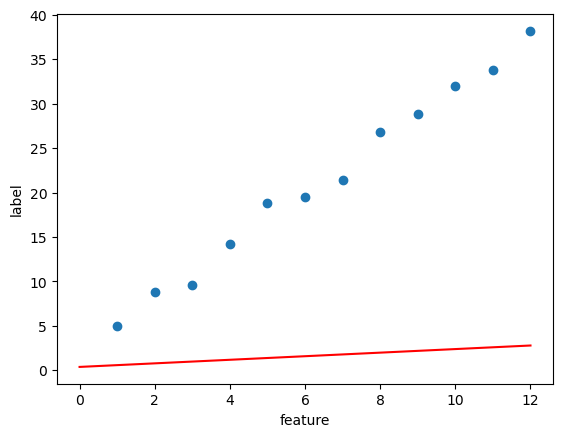

In [10]:
plot_the_model(trained_weight, trained_bias,
               my_features.detach().numpy()[:, 0],
               my_labels.detach().numpy()[:, 0])

> ### Increasing the number of epochs

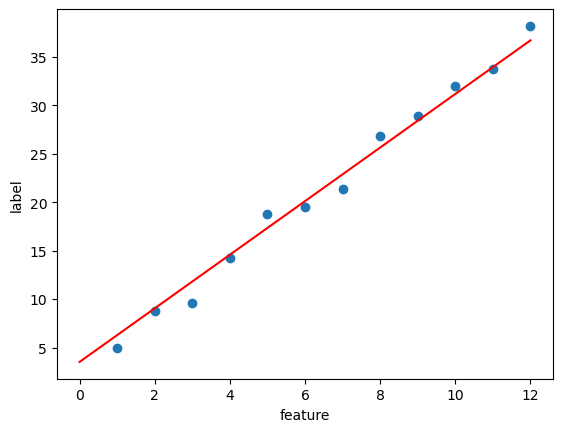

In [12]:
learning_rate = 0.01
epochs = 450
my_batch_size = 12 

model, loss, optimizer = build_model(learning_rate)

trained_weight, trained_bias, loss_list = train_model(model, loss, optimizer,
                                                      my_features, my_labels, epochs,
                                                      batch_size)

plot_the_model(trained_weight, trained_bias,
               my_features.detach().numpy()[:, 0],
               my_labels.detach().numpy()[:, 0])

> ### Increasing the learning rate

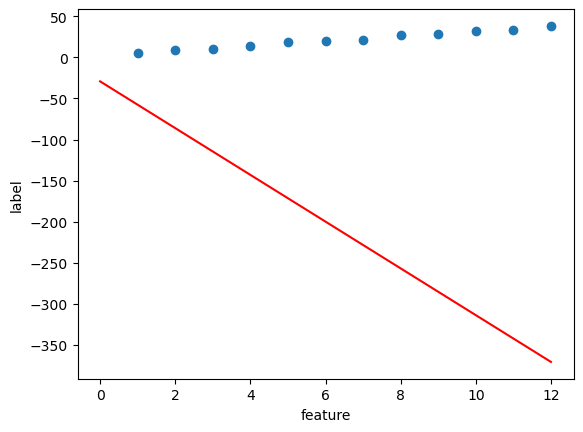

In [13]:
learning_rate = 100 
epochs = 500 
my_batch_size = 12 

model, loss, optimizer = build_model(learning_rate)

trained_weight, trained_bias, loss_list = train_model(model, loss, optimizer,
                                                      my_features, my_labels, epochs,
                                                      batch_size)

plot_the_model(trained_weight, trained_bias,
               my_features.detach().numpy()[:, 0],
               my_labels.detach().numpy()[:, 0])

> #### Experimenting to find the best learning rate and number of epochs

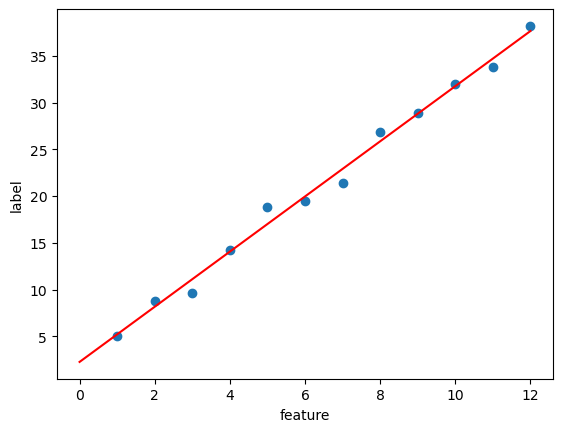

In [14]:
learning_rate = 0.14
epochs = 70

my_batch_size = 12 

model, loss, optimizer = build_model(learning_rate)

trained_weight, trained_bias, loss_list = train_model(model, loss, optimizer,
                                                      my_features, my_labels, epochs,
                                                      batch_size)

plot_the_model(trained_weight, trained_bias,
               my_features.detach().numpy()[:, 0],
               my_labels.detach().numpy()[:, 0])

> ## Summary of hyperparameter tuning
+ Most machine learning problems require a lot of hyperparameter tuning. Unfortunately, we can't provide concrete tuning rules for every model<br><br>
+ Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly. We must experiment to find the best set of hyperparameters for our dataset. That said, here are a few rules of thumb:
    + Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero<br><br>
    + If the training loss does not converge, train for more epochs<br><br>
    + If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging<br><br>
    + If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate<br><br>
    + Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination<br><br>
    + Setting the batch size to a very small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation<br><br>
    + For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory<br><br>

> **Remember:** the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.